### Problem Statement

###### *Severe challenges persist in the identification and mitigation of material misstatement, fraud,and compliance failure risks within the audit process. While technology has so far advanced,the complexity-volume factor keeps the assessment and prioritisation of risk a challenge in financial data. Therefore, the need exists for an intelligent data-driven solution that willpredict the potential audit risks and also provide meaningful insights to mitigate risks andoptimise the processes.*



### Solution Overview
###### Our team, RiskRover, proposes an advanced audit risk analytics platform that revolutionises the audit process through cutting-edge data science techniques. This innovative platform analyses historical audit data, financial statements, and relevant external factors to provide a comprehensive approach to risk assessment and mitigation. Our solution employs sophisticated predictive modelling, natural language processing, and intelligent automation to:
1. Predict potential risks with high accuracy
2. Prioritise key focus areas for auditors
3. Generate data-driven risk mitigation strategies
4. Continuously optimise the audit process through adaptive learning


### Exploratory Data Analysis (EDA)

EDA helps us understand the patterns, relationships, and key insights hidden in the data before diving into predictive modeling. It is important to identify any anomalies, trends, and correlations that can influence the prediction model.

Data Overview:

1. Display basic statistics about the data.
2. Identify missing values and data types.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats.mstats import winsorize

In [2]:
# Load the dataset
from google.colab import files
uploaded = files.upload()

Saving Rove_audit_data.csv to Rove_audit_data.csv


In [3]:
data = pd.read_csv('Rove_audit_data.csv')

In [4]:
# Quick look at the data
print(data.head())
print(data.info())
print(data.describe())

   company_id industry_code       revenue  total_assets  current_ratio  \
0           1             D  1.054697e+06   5298752.908       1.132913   
1           2             E  1.362883e+06   4248208.950       1.540998   
2           3             C  1.240505e+06   4573642.404       1.728640   
3           4             E  1.111942e+06   6148445.709       2.227911   
4           5             E  6.047628e+05   5113270.411       1.852253   

   debt_to_equity_ratio  inventory_turnover  days_sales_outstanding  \
0              0.704259            6.146028               43.316151   
1              0.914753            2.162494               41.739875   
2              1.358429            4.983390               48.903662   
3              1.268394            4.894181               43.460948   
4              0.588142            4.546364               41.796149   

   gross_margin  net_profit_margin  return_on_assets audit_findings  \
0      0.354477           0.104884          0.040055     

In [5]:
# 1. Checking for missing values
print("\nMissing Values:\n", data.isnull().sum())



Missing Values:
 company_id                    0
industry_code                 0
revenue                       0
total_assets                  0
current_ratio                 0
debt_to_equity_ratio          0
inventory_turnover            0
days_sales_outstanding        0
gross_margin                  0
net_profit_margin             0
return_on_assets              0
audit_findings              711
previous_year_risk_level      0
risk_level                    0
dtype: int64


In [6]:
# Fill missing values with a placeholder 'Unknown'
data['audit_findings'].fillna('Unknown', inplace=True)

<ipython-input-6-b7e6e58080bf>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['audit_findings'].fillna('Unknown', inplace=True)


Univariate Analysis:

Analyze individual features like revenue, total_assets, etc., using histograms and boxplots.

In [7]:
# 2. Visualizing the distribution of numerical features
numerical_columns = ['revenue', 'total_assets', 'current_ratio', 'debt_to_equity_ratio',
                     'inventory_turnover', 'days_sales_outstanding', 'gross_margin',
                     'net_profit_margin', 'return_on_assets']


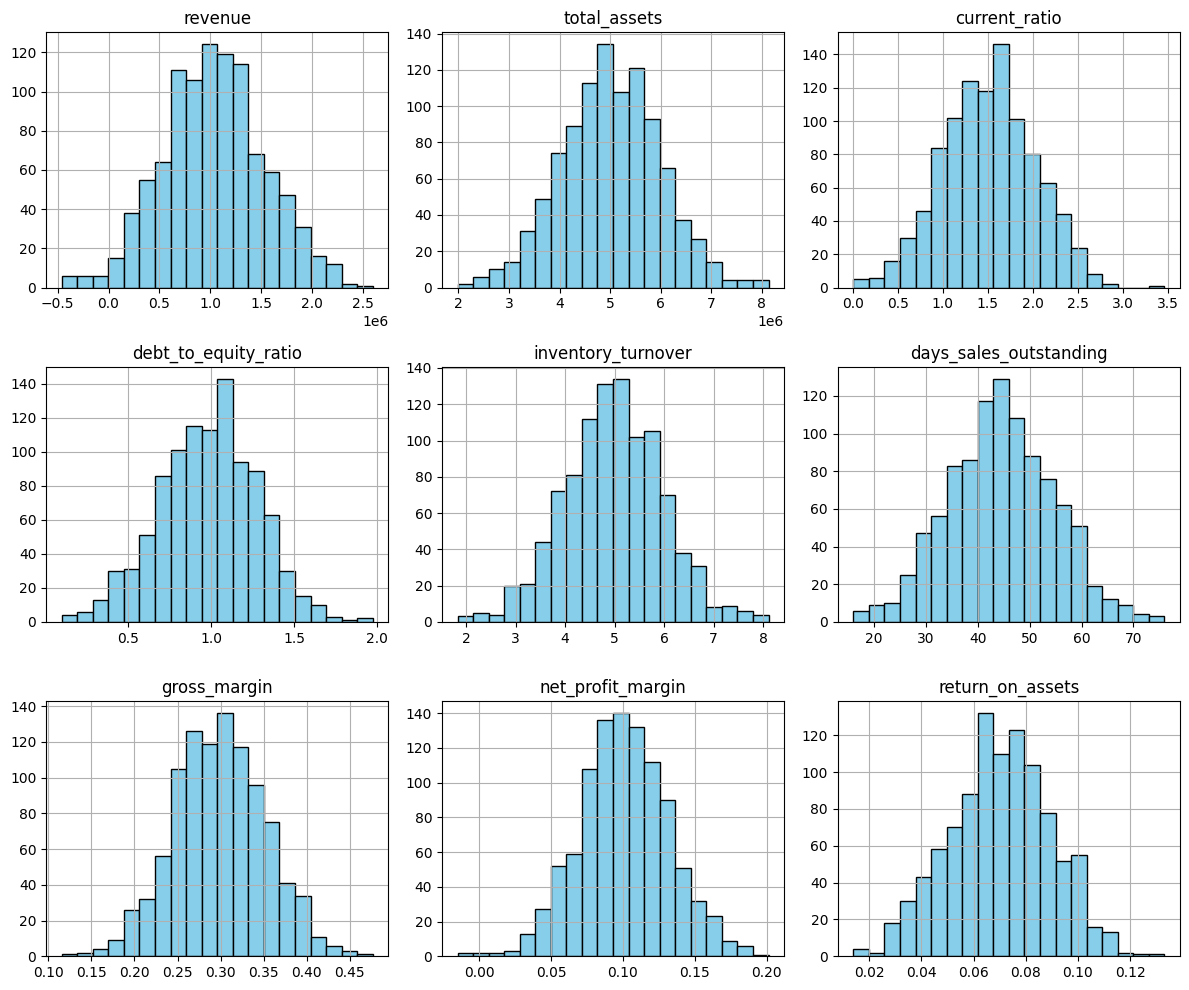

In [8]:
# Histograms for numerical columns
data[numerical_columns].hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

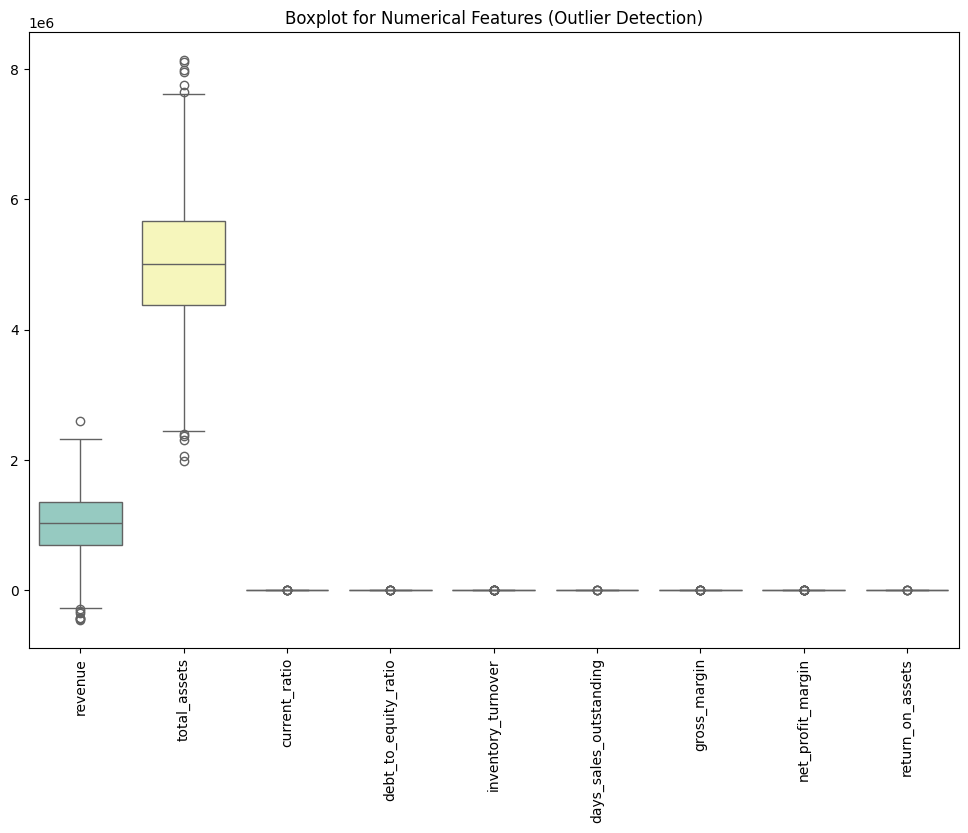

In [9]:
# Boxplots to detect outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[numerical_columns], palette="Set3")
plt.xticks(rotation=90)
plt.title("Boxplot for Numerical Features (Outlier Detection)")
plt.show()

In [10]:
# 3. Analyzing Categorical Features (Industry Code, Risk Levels)
print("\nUnique values in categorical columns:")
print(data['industry_code'].value_counts())
print(data['risk_level'].value_counts())



Unique values in categorical columns:
industry_code
A    210
D    206
E    204
C    190
B    190
Name: count, dtype: int64
risk_level
Low       611
Medium    296
High       93
Name: count, dtype: int64


<ipython-input-11-ee4e0145b7ed>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='risk_level', palette='viridis')


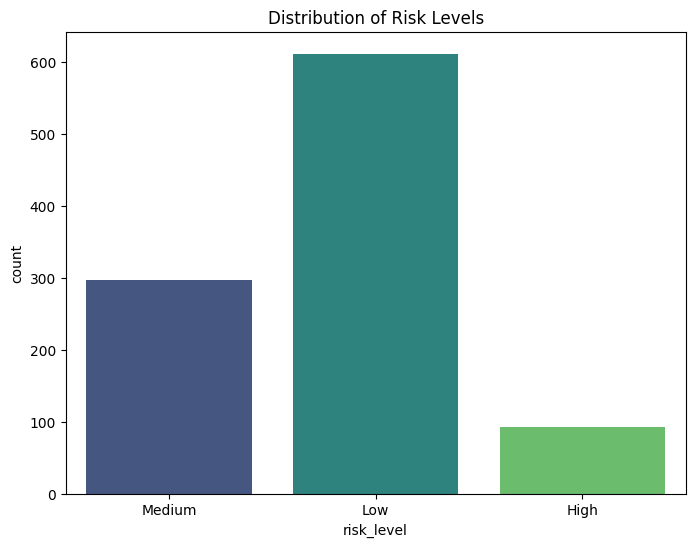

In [11]:
# Bar plots for categorical variables
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='risk_level', palette='viridis')
plt.title("Distribution of Risk Levels")
plt.show()

Bivariate/Multivariate Analysis:

1. Explore relationships between features like debt_to_equity_ratio and risk_level.
2. Using scatter plots, correlation matrices, and pair plots.

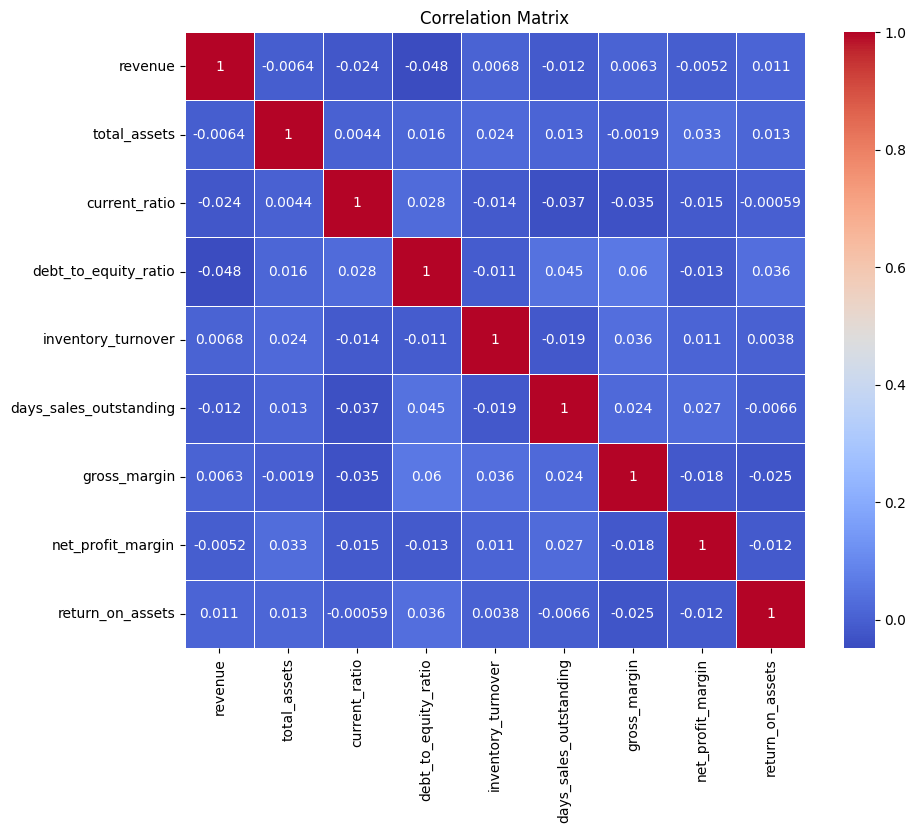

In [12]:
# 4. Correlation Matrix to analyze relationships between numerical variables
corr_matrix = data[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

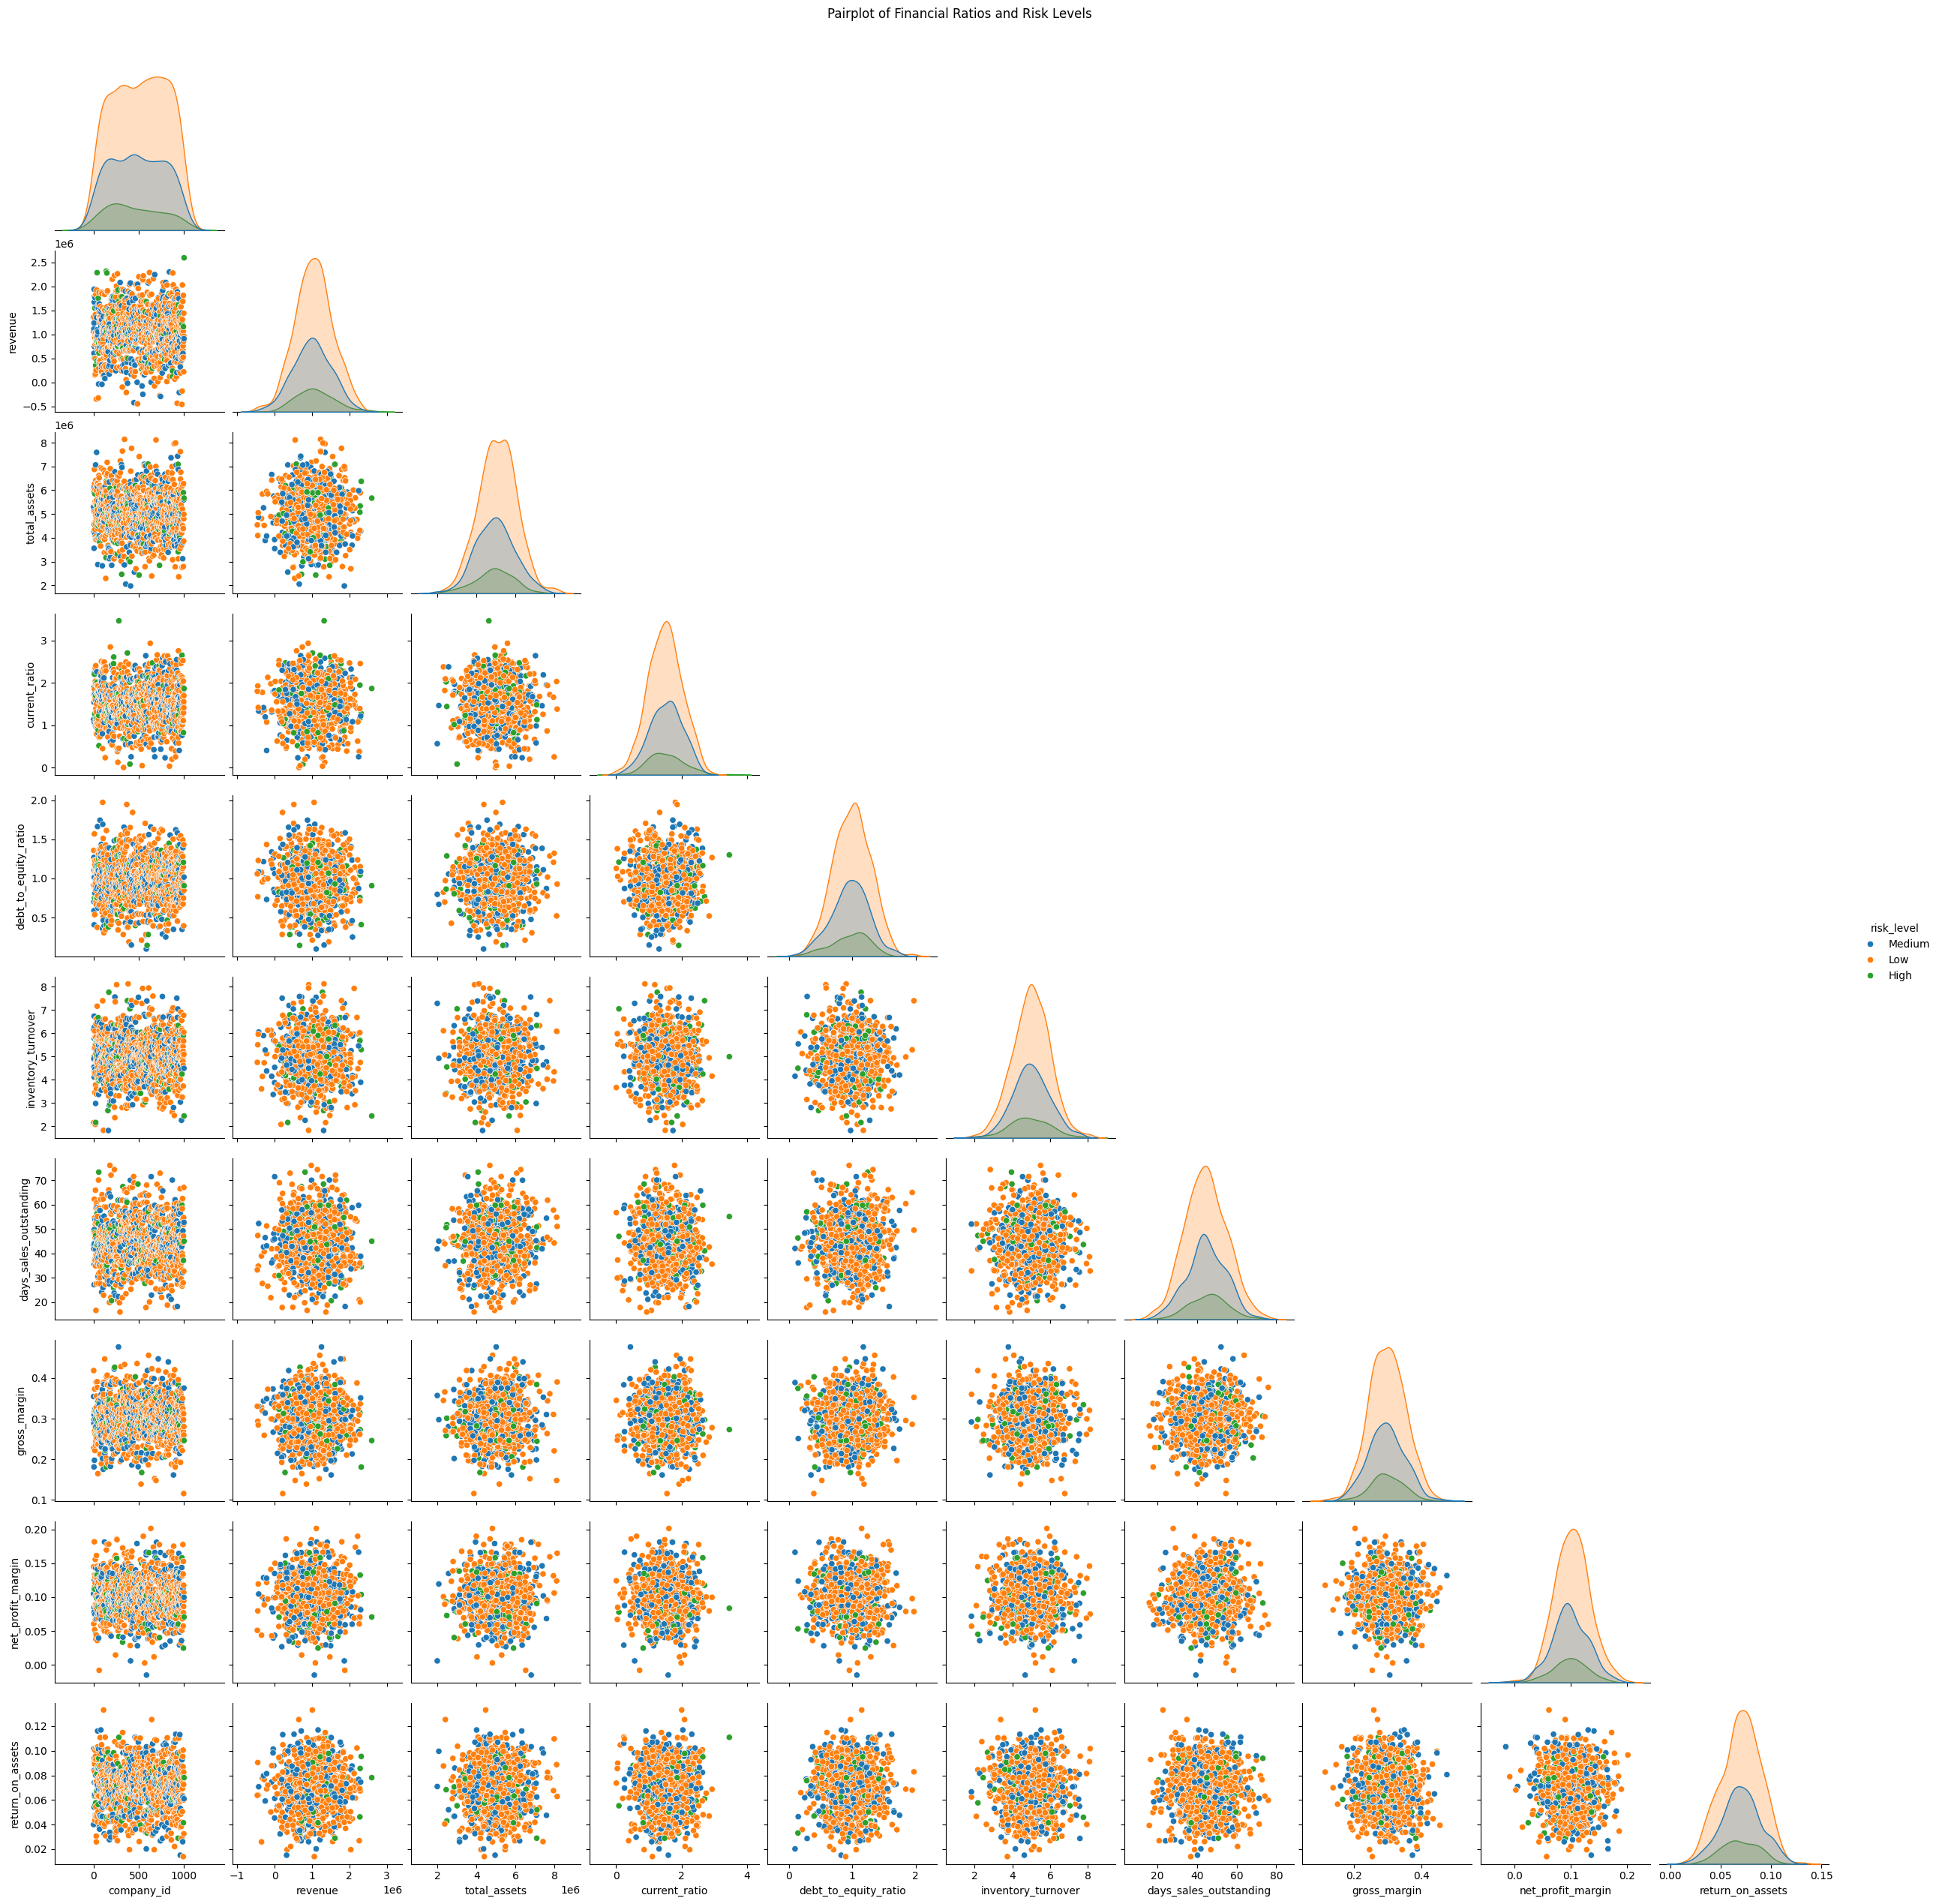

In [13]:
# 5. Pairplot to examine relationships and interactions between variables
sns.pairplot(data, hue='risk_level', diag_kind='kde', corner=True)
plt.suptitle('Pairplot of Financial Ratios and Risk Levels', y=1.02)
plt.show()

Data Distribution and Outliers:

1. Check for outliers that might skew the results.
2. Look for skewness in distributions.


In [14]:
# 6. Outlier Detection using IQR (Interquartile Range)
Q1 = data[numerical_columns].quantile(0.25)
Q3 = data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

outliers = ((data[numerical_columns] < (Q1 - 1.5 * IQR)) | (data[numerical_columns] > (Q3 + 1.5 * IQR))).sum()
print("\nOutliers in the dataset:\n", outliers)


Outliers in the dataset:
 revenue                    8
total_assets              11
current_ratio              6
debt_to_equity_ratio       7
inventory_turnover        11
days_sales_outstanding     4
gross_margin               8
net_profit_margin         10
return_on_assets           4
dtype: int64


In [15]:

# Apply winsorization to cap outliers
for col in ['revenue', 'total_assets', 'current_ratio', 'debt_to_equity_ratio',
            'inventory_turnover', 'days_sales_outstanding', 'gross_margin',
            'net_profit_margin', 'return_on_assets']:
    data[col] = winsorize(data[col], limits=[0.05, 0.05])  # Capping the top and bottom 5%


Correlation Analysis:

<ipython-input-16-09691788b7e6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='risk_level', y='revenue', palette='Set2')


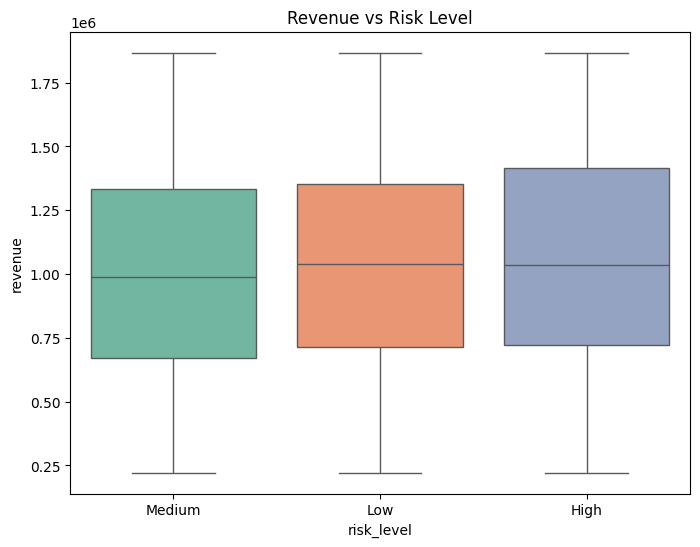

In [16]:
# 7. Relationship between Revenue and Risk Level
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='risk_level', y='revenue', palette='Set2')
plt.title("Revenue vs Risk Level")
plt.show()

### Model Building and Evaluatiion.

Feature Engineering:

In [17]:
data['asset_turnover'] = data['revenue'] / data['total_assets']
data['leverage_ratio'] = data['total_assets'] / data['debt_to_equity_ratio']

print(data.head())


   company_id industry_code       revenue  total_assets  current_ratio  \
0           1             D  1.054697e+06   5298752.908       1.132913   
1           2             E  1.362883e+06   4248208.950       1.540998   
2           3             C  1.240505e+06   4573642.404       1.728640   
3           4             E  1.111942e+06   6148445.709       2.227911   
4           5             E  6.047628e+05   5113270.411       1.852253   

   debt_to_equity_ratio  inventory_turnover  days_sales_outstanding  \
0              0.704259            6.146028               43.316151   
1              0.914753            3.368665               41.739875   
2              1.358429            4.983390               48.903662   
3              1.268394            4.894181               43.460948   
4              0.588142            4.546364               41.796149   

   gross_margin  net_profit_margin  return_on_assets audit_findings  \
0      0.354477           0.104884          0.040055     

Model Selection & Building:

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder
# Split data into train and test sets
X = data.drop(['risk_level'], axis=1)
y = data['risk_level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LabelEncoder object
encoder = LabelEncoder()

# Assuming 'company_size' column has 'D' value, replace it and other categories with numericals
for col in X_train.select_dtypes(include=['object']).columns:
    X_train[col] = encoder.fit_transform(X_train[col])
    # Apply the same encoding to X_test using the fitted encoder
    X_test[col] = encoder.transform(X_test[col])

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Hyperparameter Tuning (optional)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)


Accuracy: 0.535
              precision    recall  f1-score   support

        High       0.00      0.00      0.00        18
         Low       0.55      0.95      0.70       111
      Medium       0.11      0.01      0.03        71

    accuracy                           0.54       200
   macro avg       0.22      0.32      0.24       200
weighted avg       0.35      0.54      0.40       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Best parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00        18
         Low       1.00      1.00      1.00       111
      Medium       1.00      1.00      1.00        71

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Actual vs Predicted Risk Levels:
     Actual Predicted
521     Low       Low
737    High      High
740     Low       Low
660     Low       Low
411  Medium    Medium


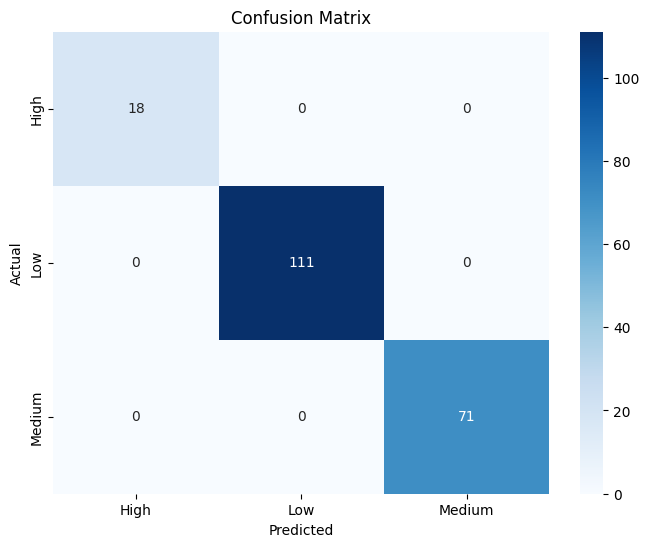


Best parameters from Grid Search: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming 'data' is your DataFrame
# Split data into features (X) and target (y)
X = data.drop(['risk_level'], axis=1)  # Features
y = data['risk_level']  # Target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LabelEncoder object to encode categorical features
encoder = LabelEncoder()

# Encode categorical columns in both X_train and X_test
for col in X_train.select_dtypes(include=['object']).columns:
    X_train[col] = encoder.fit_transform(X_train[col])
    X_test[col] = encoder.transform(X_test[col])

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Print actual vs predicted risk levels
print("\nActual vs Predicted Risk Levels:")
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.head())  # Print the first few rows of actual vs predicted values

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Hyperparameter Tuning (optional)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("\nBest parameters from Grid Search:", grid_search.best_params_)


In [43]:
def suggest_mitigation(risk_level):
    if risk_level == 'High':
        return "Investigate debt levels and cash flow patterns."
    elif risk_level == 'Medium':
        return "Review inventory management and tax filings."
    else:
        return "Routine checks suggested."

# Applying the function
data['recommendation'] = data['risk_level'].apply(suggest_mitigation)


In [45]:
print(data[['risk_level', 'recommendation']].head())

  risk_level                                recommendation
0     Medium  Review inventory management and tax filings.
1        Low                     Routine checks suggested.
2        Low                     Routine checks suggested.
3     Medium  Review inventory management and tax filings.
4     Medium  Review inventory management and tax filings.


In [27]:
!pip install dash dash-bootstrap-components plotly


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 9.7 MB/s eta 0:00:00


In [35]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

# Initialize Dash app
app = dash.Dash(__name__)

# Sample data: Replace this with the actual data loading step
df = pd.read_csv('Rove_audit_data.csv')

# Define color mapping for risk levels
color_discrete_map = {
    'Low': 'green',
    'Medium': 'orange',
    'High': 'red'
}

# Layout
app.layout = html.Div([
    html.H1("Financial Risk Dashboard", style={'textAlign': 'center'}),

    # Dropdown for selecting industry_code
    dcc.Dropdown(
        id="dropdown",
        options=[{"label": x, "value": x} for x in df["industry_code"].unique()],
        value=df["industry_code"].unique()[0],  # Default to the first industry code
        clearable=False,
        style={'width': '50%', 'margin': 'auto'}
    ),

    # Bar chart to display risk_level vs revenue
    dcc.Graph(id="bar-chart"),
])

# Callback to update the graph
@app.callback(
    Output("bar-chart", "figure"),
    [Input("dropdown", "value")]
)
def update_bar_chart(selected_industry):
    # Filter the DataFrame based on selected industry code
    filtered_df = df[df["industry_code"] == selected_industry]

    # Create a colorful bar chart with company_id, revenue, and risk_level
    fig = px.bar(filtered_df, x="company_id", y="revenue", color="risk_level",
                 title=f"Revenue and Risk Levels for Industry {selected_industry}",
                 labels={'revenue': 'Revenue', 'company_id': 'Company ID'},
                 color_discrete_map=color_discrete_map,  # Apply custom colors
                 barmode="group")

    # Update layout for a more polished look
    fig.update_layout(
        xaxis_title="Company ID",
        yaxis_title="Revenue",
        title_x=0.5,  # Center the title
        plot_bgcolor='rgba(0,0,0,0)',  # Make the background transparent
        paper_bgcolor='rgba(245,245,245,1)',  # Light grey background for the plot
        font=dict(size=14)
    )

    return fig

if __name__ == "__main__":
    app.run_server(debug=True)


<IPython.core.display.Javascript object>